# ECE 657 ASSIGNMENT 3: Problem 1
## CNN

Harnoor Singh: 20870613  
Jubilee Imhanzenobe: 20809735  
Olohireme Ajayi: 20869827  

In [1]:
# importing libraries
# !pip install -q -U tensorflow>=1.8.0
!pip install keras-visualizer
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, time

# Function for plotting curves

In [2]:
def accuracy_loss_plot(model):
  """ function that plots training and validation curves """
  hist = model.history
  acc = hist['accuracy']
  val_acc = hist['val_accuracy']
  loss = hist['loss']
  val_loss = hist['val_loss']
  epoch = range(1, 6)              # Number of epochs is 5

  fig = plt.figure(figsize = (12,10))
  fig.tight_layout(pad=7.0)
  plt.subplot(2,2,1)
  plt.plot(acc,loss)
  plt.xlabel('Accuracy')
  plt.ylabel('Loss')
  plt.legend(['train set'], loc='upper right')
  plt.title('Training Accuracy vs Loss')

  plt.subplot(2,2,2)
  plt.plot(val_acc, val_loss)
  plt.xlabel('Accuracy')
  plt.ylabel('Loss')
  plt.legend(['validation set'], loc='upper right')
  plt.title('Validation Accuracy vs Loss')

  plt.subplot(2,2,3)
  plt.plot(epoch, acc)
  plt.plot(epoch, val_acc)
  plt.xlabel('Epoch')
  plt.xticks(range(1, 6))
  plt.ylabel('Accuracy')
  plt.legend(['train set', 'validation set'], loc='lower right')
  plt.title('Accuracy vs Epoch')

  plt.subplot(2,2,4)
  plt.plot(epoch, loss)
  plt.plot(epoch, val_loss)
  plt.xlabel('Epoch')
  plt.xticks(range(1, 6))
  plt.ylabel('Loss')
  plt.legend(['train set', 'validation set'], loc='upper right')
  plt.title('Loss vs Epoch')

  plt.show()

In [3]:
def compare_models(history_list, labels, epochs = 5):
    """ Function for plotting the accuracy and loss for training and validation set to compare the models """
    fig, axs = plt.subplots(2, 2, figsize=(12,8))
    count = 0
    epochs = list(range(1, epochs + 1))
    final_train = []
    final_val = []
    final_loss = []
    final_val_loss = []
    for history in history_list:
        label = labels[count]
        val_accuracy = history.history['val_accuracy']
        val_loss = history.history['val_loss']
        train_accuracy = history.history['accuracy']
        train_loss = history.history['loss']
        axs[0,0].plot(epochs, train_accuracy, label= label)
        axs[1,0].plot(epochs, train_loss, label=label)
        axs[0,1].plot(epochs, val_accuracy, label= label)
        axs[1,1].plot(epochs, val_loss, label=label)
        count += 1
        
        final_train.append(round(history.history['accuracy'][-1] * 100, 2))
        final_val.append(round(history.history['loss'][-1], 4))
        final_loss.append(round(history.history['val_accuracy'][-1] * 100, 2))
        final_val_loss.append(round(history.history['val_loss'][-1], 4))

    axs[0,0].set_ylabel('Training accuracy')
    axs[1,0].set_ylabel('Training loss')
    axs[0,1].set_ylabel('Validation accuracy')
    axs[1,1].set_ylabel('Validation loss')
    axs[0,0].set_xlabel('Epochs')
    axs[1,0].set_xlabel('Epochs')
    axs[0,1].set_xlabel('Epochs')
    axs[1,1].set_xlabel('Epochs')

    axs[0,0].legend(loc='upper center', bbox_to_anchor=(1.1, -1.4),
              ncol=4, fancybox=True, shadow=True)
    
    columns = ["Train Accuracy", "Train Loss", "Val Accuracy", "Val Loss"]
    result = pd.DataFrame(np.array([final_train, final_val, final_loss, final_val_loss]).T, index = labels, columns = columns)
    return result


# Preparing our dataset: Loading and Preprocessing

# 1. **PREPROCESSING STEPS -** 

*   Randomly sampling 20% of the training set, and using that as new training set.
*   Using the test set for validation.
*   Normalizing the data by scaling pixels in the range 0-1.
*   One-hot encoding the labels.
*   Reshaping the train set and validation set for feeding them to the MLP. 





In [4]:
# downloading and loading the dataset 
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Randomly sampling 20% of the training set and using that as new training set
X_train, X_test2, y_train, y_test2 = train_test_split(X_train, y_train, train_size=0.2, random_state=0)

# Using the test set for validation
X_val, y_val = X_test, y_test

In [5]:
# normalizing the data
X_train = X_train / 255.0
X_val = X_val / 255.0

In [6]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape: ', X_val.shape)
print('y_val shape: ', y_val.shape)

X_train shape:  (10000, 32, 32, 3)
y_train shape:  (10000, 1)
X_val shape:  (10000, 32, 32, 3)
y_val shape:  (10000, 1)


In [7]:
# one-hot encoding the labels
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

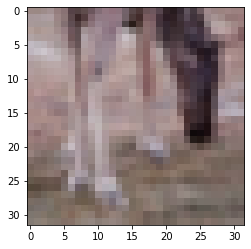

In [8]:
# printing one training sample
plt.imshow(X_train[1])
plt.show()

# 2. **DESCRIPTION OF OUTPUT LAYER AND LOSS FUNCTION -**

**Number of Units** - There should be 'n' neurons in the output layer if we are classifying between 'n' categories/classes. Since the number of classes are 10 (10 outputs to the classification problem), the number of nodes in the output layer is 10.

**Activation Function** - The activation function used in the output layer is Softmax. A Softmax function is a type of squashing function. Squashing functions limit the output of the function into the range 0 to 1. This allows the output to be interpreted directly as a probability. Softmax functions are most often used as the output of a classifier, to represent the probability distribution over n different classes. Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would. Since our dataset has 10 classes, we are using softmax. Sigmoid and Softmax both give output in [0,1] range but softmax ensures that the sum of outputs is 1 i.e., they are probabilities. Sigmoid just makes output between 0 to 1, the sum of probabilities might not be 1 and it works better for binary classification problem. More rarely, softmax functions can be used inside the model itself, if we wish the model to choose between one of n different options for some internal variable.

**Loss Function** - The choice of loss function is directly related to the activation function used in the output layer of the neural network. These two design elements are connected. For regression problems, functions like Mean Squared Error (MSE) and Mean Absolute Error (MAE) are used since we predict a real-value quantity. For classification problems, cross-entropy loss functions are used. Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. Since our problem is multi-class classification, and we are using softmax activation in the output layer, we can use either categorical cross entropy or sparse categorical cross entropy. Both, categorical cross entropy, and sparse categorical cross entropy have the same loss function. The only difference is the format in which we mention the true labels. If true-labels are one-hot encoded, we use categorical_crossentropy. But if labels are integers, we use sparse_categorical_crossentropy. Our labels are one-hot encoded, hence the use of categorical cross-entropy.


# Model definition and training: MLP

In [9]:
# reshaping data for MLP
X_train_MLP = X_train.reshape(-1, 3072)
X_val_MLP = X_val.reshape(-1, 3072)

In [10]:
# batch size and number of epochs
EPOCHS = 5
BATCH_SIZE = 32

In [11]:
# shapes of train and validation sets that are to be fed to MLP
print('X_train_MLP shape: ', X_train_MLP.shape)
print('X_val_MLP shape: ', X_val_MLP.shape)

X_train_MLP shape:  (10000, 3072)
X_val_MLP shape:  (10000, 3072)


In [12]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras import activations
from tensorflow.keras.optimizers import Adam

MLP = Sequential()
MLP.add(Dense(512, activation='sigmoid', input_shape=(3072, )))
MLP.add(Dense(512, activation='sigmoid'))
MLP.add(Dense(10,  activation='softmax'))

MLP.compile(loss='categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])

In [13]:
MLP.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the model
start_time = time.time()
with tf.device('/device:GPU:0'):
    train_MLP = MLP.fit(X_train_MLP, y_train, batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, verbose=1, validation_data=(X_val_MLP, y_val))
end_time = time.time()
print("Total training time : {:0.2f} minute".format((end_time - start_time)/60.0))

Epoch 1/5
313/313 [==============================] - 14s 8ms/step - loss: 2.1867 - accuracy: 0.1980 - val_loss: 1.9364 - val_accuracy: 0.2650
Epoch 2/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9111 - accuracy: 0.3075 - val_loss: 1.8711 - val_accuracy: 0.3309
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 1.8645 - accuracy: 0.3207 - val_loss: 1.8145 - val_accuracy: 0.3412
Epoch 4/5
313/313 [==============================] - 2s 5ms/step - loss: 1.8059 - accuracy: 0.3457 - val_loss: 1.8214 - val_accuracy: 0.3388
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 1.7588 - accuracy: 0.3559 - val_loss: 1.8008 - val_accuracy: 0.3388
Total training time : 0.36 minute


In [15]:
# training accuracy and loss for MLP
score_train_MLP = MLP.evaluate(X_train_MLP, y_train, verbose=0)
print('Train accuracy for MLP:', score_train_MLP[1])
print('Train loss for MLP:', score_train_MLP[0])

Train accuracy for MLP: 0.35429999232292175
Train loss for MLP: 1.7643574476242065


In [16]:
# validation accuracy and loss for MLP
score_val_MLP = MLP.evaluate(X_val_MLP, y_val, verbose=0)
print('Validation accuracy for MLP:', score_val_MLP[1])
print('Validation loss for MLP:', score_val_MLP[0])

Validation accuracy for MLP: 0.33880001306533813
Validation loss for MLP: 1.800845742225647


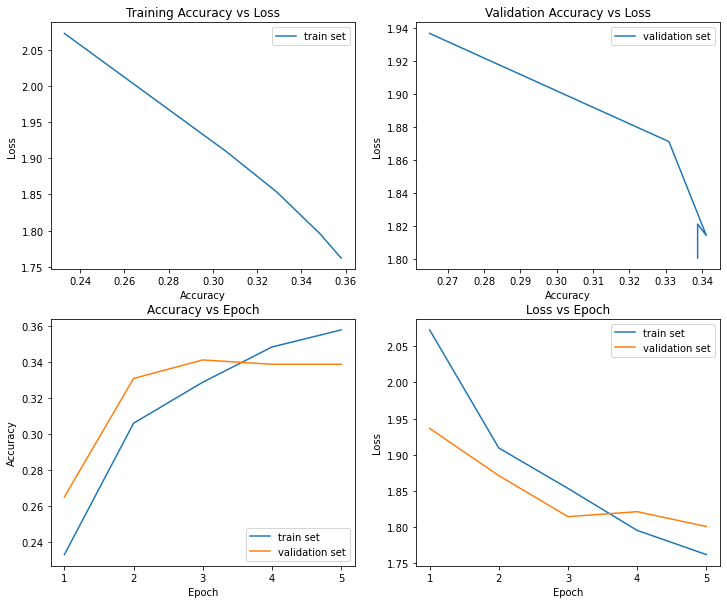

In [17]:
accuracy_loss_plot(train_MLP)

# Model definition and training: CNN1

In [18]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD
from keras_visualizer import visualizer

In [19]:
CNN1 = Sequential()
CNN1.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                input_shape=(32, 32, 3)))
CNN1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
CNN1.add(Flatten())
CNN1.add(Dense(512, activation='sigmoid'))
CNN1.add(Dense(512, activation='sigmoid'))
CNN1.add(Dense(10, activation='softmax'))

CNN1.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

In [20]:
CNN1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25690624  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 25,997,130
Trainable params: 25,997,130
Non-trainable params: 0
____________________________________________

In [21]:
# Train the the model
start_time = time.time()
with tf.device('/device:GPU:0'):
    train_CNN1 = CNN1.fit(X_train, y_train, batch_size=BATCH_SIZE, 
                      epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val))
end_time = time.time()
print("Total training time : {:0.2f} minute".format((end_time - start_time)/60.0))

Epoch 1/5
313/313 [==============================] - 7s 16ms/step - loss: 1.7629 - accuracy: 0.3509 - val_loss: 1.4514 - val_accuracy: 0.4608
Epoch 2/5
313/313 [==============================] - 4s 13ms/step - loss: 1.3392 - accuracy: 0.5168 - val_loss: 1.3624 - val_accuracy: 0.5064
Epoch 3/5
313/313 [==============================] - 5s 15ms/step - loss: 1.0393 - accuracy: 0.6306 - val_loss: 1.3153 - val_accuracy: 0.5331
Epoch 4/5
313/313 [==============================] - 5s 15ms/step - loss: 0.6606 - accuracy: 0.7761 - val_loss: 1.3813 - val_accuracy: 0.5472
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.2962 - accuracy: 0.9115 - val_loss: 1.5696 - val_accuracy: 0.5391
Total training time : 0.41 minute


In [22]:
# training accuracy and loss for CNN1
score_train_CNN1 = CNN1.evaluate(X_train, y_train, verbose=1)
print('Train accuracy for CNN1:', score_train_CNN1[1])
print('Train loss for CNN1:', score_train_CNN1[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.1565 - accuracy: 0.9648
Train accuracy for CNN1: 0.9648000001907349
Train loss for CNN1: 0.1564616709947586


In [23]:
# validation accuracy and loss for CNN1
score_val_CNN1 = CNN1.evaluate(X_val, y_val, verbose=1)
print('Validation accuracy for CNN1:', score_val_CNN1[1])
print('Validation loss for CNN1:', score_val_CNN1[0])

313/313 [==============================] - 1s 3ms/step - loss: 1.5696 - accuracy: 0.5391
Validation accuracy for CNN1: 0.5390999913215637
Validation loss for CNN1: 1.5696282386779785


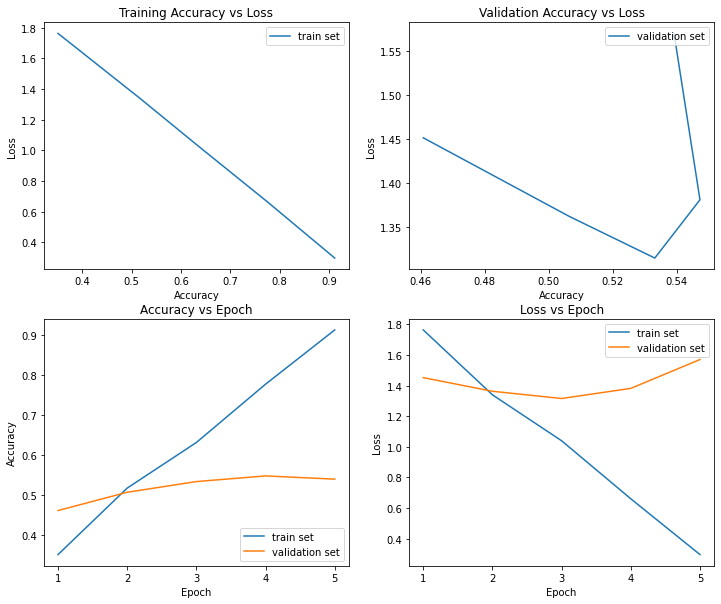

In [24]:
accuracy_loss_plot(train_CNN1)

# Model definition and training: CNN2

In [25]:
CNN2 = Sequential()
CNN2.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                input_shape=(32, 32, 3)))
CNN2.add(MaxPooling2D((2, 2)))
CNN2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
CNN2.add(MaxPooling2D((2, 2)))
CNN2.add(Flatten())
CNN2.add(Dense(512, activation='sigmoid'))
CNN2.add(Dropout(0.2))
CNN2.add(Dense(512, activation='sigmoid'))
CNN2.add(Dropout(0.2))
CNN2.add(Dense(10, activation='softmax'))

CNN2.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

In [26]:
CNN2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dropout (Dropout)            (None, 512)              

In [27]:
# Train the the model
start_time = time.time()
with tf.device('/device:GPU:0'):
    train_CNN2 = CNN2.fit(X_train, y_train, batch_size=BATCH_SIZE, 
                      epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val))
end_time = time.time()
print("Total training time : {:0.2f} minute".format((end_time - start_time)/60.0))

Epoch 1/5
313/313 [==============================] - 3s 7ms/step - loss: 1.9403 - accuracy: 0.2829 - val_loss: 1.5937 - val_accuracy: 0.4041
Epoch 2/5
313/313 [==============================] - 2s 6ms/step - loss: 1.5332 - accuracy: 0.4352 - val_loss: 1.4321 - val_accuracy: 0.4706
Epoch 3/5
313/313 [==============================] - 3s 8ms/step - loss: 1.3842 - accuracy: 0.4993 - val_loss: 1.3537 - val_accuracy: 0.5141
Epoch 4/5
313/313 [==============================] - 2s 6ms/step - loss: 1.2086 - accuracy: 0.5671 - val_loss: 1.2367 - val_accuracy: 0.5567
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 1.0903 - accuracy: 0.6156 - val_loss: 1.1752 - val_accuracy: 0.5815
Total training time : 0.35 minute


In [28]:
# training accuracy and loss for CNN1
score_train_CNN2 = CNN2.evaluate(X_train, y_train, verbose=0)
print('Train accuracy for CNN2:', score_train_CNN2[1])
print('Train loss for CNN2:', score_train_CNN2[0])

Train accuracy for CNN2: 0.677299976348877
Train loss for CNN2: 0.9176803827285767


In [29]:
# validation accuracy and loss for CNN2
score_val_CNN2 = CNN2.evaluate(X_val, y_val, verbose=0)
print('Validation accuracy for CNN2:', score_val_CNN2[1])
print('Validation loss for CNN2:', score_val_CNN2[0])

Validation accuracy for CNN2: 0.5814999938011169
Validation loss for CNN2: 1.175216555595398


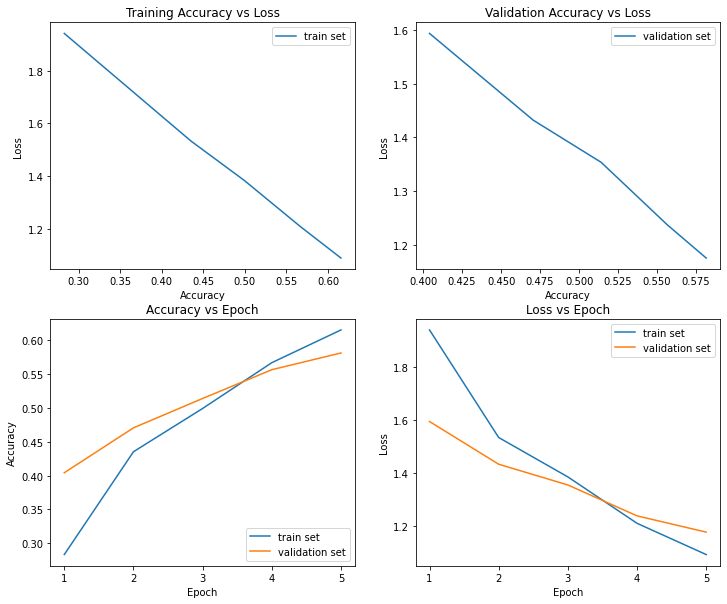

In [30]:
accuracy_loss_plot(train_CNN2)

# Additional MLP models - Changing number of layers and number of neurons per layer

## Model 1 - 2 Hidden layers with 1024 units each (in addition to input and output layer)

## MLP1 - Model Architecture

*   Fully connected layer with 1024 units and a sigmoid activation function
*   Fully connected layer with 1024 units and a sigmoid activation function
*   Fully connected layer with 1024 units and a sigmoid activation function
*   Output layer with 10 units and a softmax activation function


In [31]:
# Model 1
MLP1 = Sequential()
MLP1.add(Dense(1024, activation='sigmoid', input_shape=(3072, )))
MLP1.add(Dense(1024, activation='sigmoid'))
MLP1.add(Dense(1024, activation='sigmoid'))
MLP1.add(Dense(10,   activation='softmax'))

MLP1.compile(loss='categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])

In [32]:
MLP1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
Total params: 5,256,202
Trainable params: 5,256,202
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Train the model
start_time = time.time()
with tf.device('/device:GPU:0'):
    train_MLP1 = MLP1.fit(X_train_MLP, y_train, batch_size=BATCH_SIZE, 
                        epochs=EPOCHS, verbose=1, validation_data=(X_val_MLP, y_val))
end_time = time.time()
print("Total training time : {:0.2f} minute".format((end_time - start_time)/60.0))

Epoch 1/5
313/313 [==============================] - 2s 6ms/step - loss: 2.2171 - accuracy: 0.1602 - val_loss: 2.2082 - val_accuracy: 0.1649
Epoch 2/5
313/313 [==============================] - 2s 5ms/step - loss: 2.0508 - accuracy: 0.2288 - val_loss: 1.9718 - val_accuracy: 0.2785
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9621 - accuracy: 0.2701 - val_loss: 1.9387 - val_accuracy: 0.2739
Epoch 4/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9220 - accuracy: 0.2839 - val_loss: 1.9813 - val_accuracy: 0.2939
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 1.8825 - accuracy: 0.3089 - val_loss: 1.8720 - val_accuracy: 0.3036
Total training time : 0.15 minute


In [34]:
# training accuracy and loss for MLP1
score_train_MLP1 = MLP1.evaluate(X_train_MLP, y_train, verbose=0)
print('Train accuracy for MLP1:', score_train_MLP1[1])
print('Train loss for MLP1:', score_train_MLP1[0])

Train accuracy for MLP1: 0.31369999051094055
Train loss for MLP1: 1.8453556299209595


In [35]:
# validation accuracy and loss for MLP1
score_val_MLP1 = MLP1.evaluate(X_val_MLP, y_val, verbose=0)
print('Validation accuracy for MLP1:', score_val_MLP1[1])
print('Validation loss for MLP1:', score_val_MLP1[0])

Validation accuracy for MLP1: 0.303600013256073
Validation loss for MLP1: 1.871996521949768


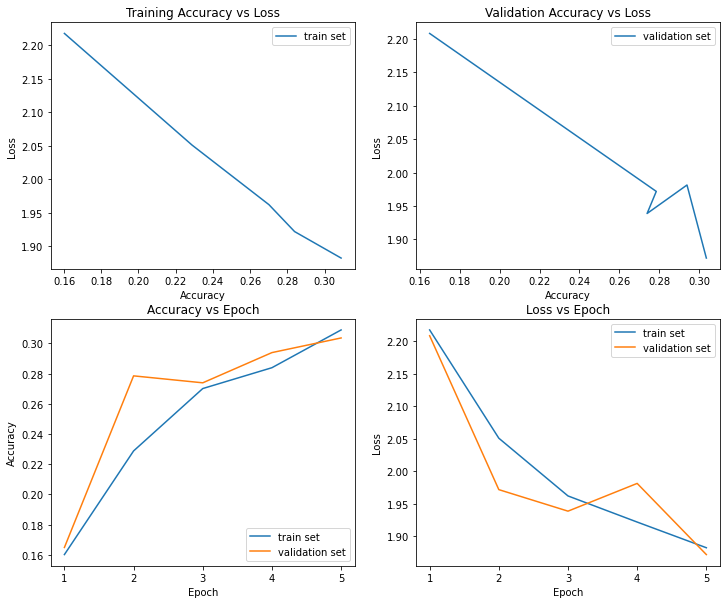

In [36]:
accuracy_loss_plot(train_MLP1)

# Model 2 - 3 Hidden layers with 256 units each (in addition to input and output layer)


## MLP2 - Model Architecture

*   Fully connected layer with 256  units and a sigmoid activation function
*   Fully connected layer with 256 units and a sigmoid activation function
*   Fully connected layer with 256 units and a sigmoid activation function
*   Fully connected layer with 256 units and a sigmoid activation function
*   Output layer with 10 units and a softmax activation function


In [37]:
# Model 2
MLP2 = Sequential()
MLP2.add(Dense(256, activation='sigmoid', input_shape=(3072, )))
MLP2.add(Dense(256, activation='sigmoid'))
MLP2.add(Dense(256, activation='sigmoid'))
MLP2.add(Dense(256, activation='sigmoid'))
MLP2.add(Dense(10,  activation='softmax'))

MLP2.compile(loss='categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])

In [38]:
MLP2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 986,634
Trainable params: 986,634
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Train the model
start_time = time.time()
with tf.device('/device:GPU:0'):
    train_MLP2 = MLP2.fit(X_train_MLP, y_train, batch_size=BATCH_SIZE, 
                        epochs=EPOCHS, verbose=1, validation_data=(X_val_MLP, y_val))
end_time = time.time()
print("Total training time : {:0.2f} minute".format((end_time - start_time)/60.0))

Epoch 1/5
313/313 [==============================] - 2s 6ms/step - loss: 2.1929 - accuracy: 0.1491 - val_loss: 2.1316 - val_accuracy: 0.1562
Epoch 2/5
313/313 [==============================] - 2s 7ms/step - loss: 2.0821 - accuracy: 0.1806 - val_loss: 2.1248 - val_accuracy: 0.1722
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 2.0271 - accuracy: 0.2158 - val_loss: 2.0413 - val_accuracy: 0.2252
Epoch 4/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9826 - accuracy: 0.2292 - val_loss: 2.0214 - val_accuracy: 0.2297
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9622 - accuracy: 0.2464 - val_loss: 1.9492 - val_accuracy: 0.2508
Total training time : 0.18 minute


In [40]:
# training accuracy and loss for MLP2
score_train_MLP2 = MLP2.evaluate(X_train_MLP, y_train, verbose=0)
print('Train accuracy for MLP2:', score_train_MLP2[1])
print('Train loss for MLP2:', score_train_MLP2[0])

Train accuracy for MLP2: 0.24869999289512634
Train loss for MLP2: 1.9285228252410889


In [41]:
# validation accuracy and loss for MLP2
score_val_MLP2 = MLP2.evaluate(X_val_MLP, y_val, verbose=0)
print('Validation accuracy for MLP2:', score_val_MLP2[1])
print('Validation loss for MLP2:', score_val_MLP2[0])

Validation accuracy for MLP2: 0.2508000135421753
Validation loss for MLP2: 1.9492193460464478


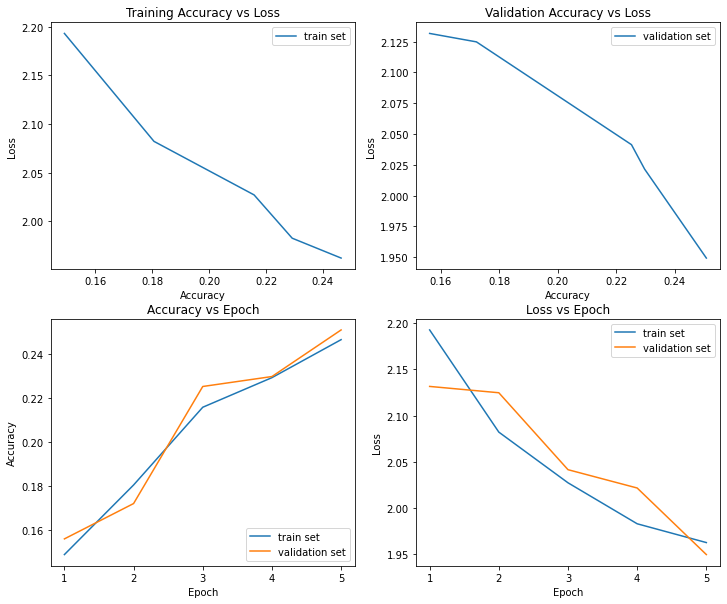

In [42]:
accuracy_loss_plot(train_MLP2)

# Model 3 - 5 Hidden layers with 512 units each (in addition to input and output layer)


## MLP3 - Model Architecture

*   Fully connected layer with 512  units and a sigmoid activation function
*   Fully connected layer with 512 units and a sigmoid activation function
*   Fully connected layer with 512 units and a sigmoid activation function
*   Fully connected layer with 512 units and a sigmoid activation function
*   Fully connected layer with 512 units and a sigmoid activation function
*   Fully connected layer with 512 units and a sigmoid activation function
*   Output layer with 10 units and a softmax activation function

In [43]:
# Model 3
MLP3 = Sequential()
MLP3.add(Dense(512, activation='sigmoid', input_shape=(3072, )))
MLP3.add(Dense(512, activation='sigmoid'))
MLP3.add(Dense(512, activation='sigmoid'))
MLP3.add(Dense(512, activation='sigmoid'))
MLP3.add(Dense(512, activation='sigmoid'))
MLP3.add(Dense(512, activation='sigmoid'))
MLP3.add(Dense(10,  activation='softmax'))

MLP3.compile(loss='categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])

In [44]:
MLP3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

In [45]:
# Train the model
start_time = time.time()
with tf.device('/device:GPU:0'):
    train_MLP3 = MLP3.fit(X_train_MLP, y_train, batch_size=BATCH_SIZE, 
                        epochs=EPOCHS, verbose=1, validation_data=(X_val_MLP, y_val))
end_time = time.time()
print("Total training time : {:0.2f} minute".format((end_time - start_time)/60.0))

Epoch 1/5
313/313 [==============================] - 3s 9ms/step - loss: 2.2606 - accuracy: 0.1345 - val_loss: 2.0821 - val_accuracy: 0.1587
Epoch 2/5
313/313 [==============================] - 2s 8ms/step - loss: 2.1196 - accuracy: 0.1760 - val_loss: 2.1538 - val_accuracy: 0.1626
Epoch 3/5
313/313 [==============================] - 2s 6ms/step - loss: 2.0955 - accuracy: 0.1795 - val_loss: 2.0699 - val_accuracy: 0.1965
Epoch 4/5
313/313 [==============================] - 2s 8ms/step - loss: 2.0746 - accuracy: 0.1815 - val_loss: 2.0703 - val_accuracy: 0.1929
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 2.0629 - accuracy: 0.1960 - val_loss: 2.0517 - val_accuracy: 0.2003
Total training time : 0.21 minute


In [46]:
# training accuracy and loss for MLP3
score_train_MLP3 = MLP3.evaluate(X_train_MLP, y_train, verbose=0)
print('Train accuracy for MLP3:', score_train_MLP3[1])
print('Train loss for MLP3:', score_train_MLP3[0])

Train accuracy for MLP3: 0.1981000006198883
Train loss for MLP3: 2.04082989692688


In [47]:
# validation accuracy and loss for MLP3
score_val_MLP3 = MLP3.evaluate(X_val_MLP, y_val, verbose=0)
print('Validation accuracy for MLP3:', score_val_MLP3[1])
print('Validation loss for MLP3:', score_val_MLP3[0])

Validation accuracy for MLP3: 0.20029999315738678
Validation loss for MLP3: 2.0517077445983887


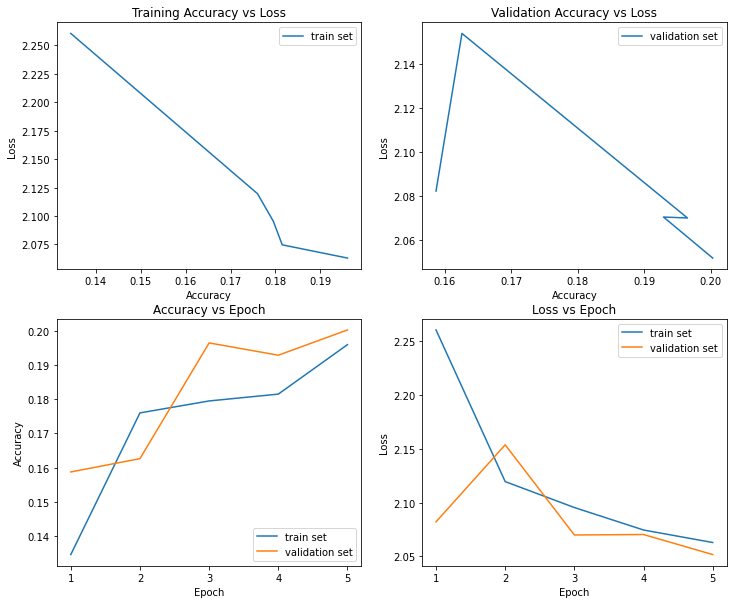

In [48]:
accuracy_loss_plot(train_MLP3)

# Model 4 - 2 Hidden layers with 64 units each (in addition to input and output layer)

## MLP4 - Model Architecture

*   Fully connected layer with 64  units and a sigmoid activation function
*   Fully connected layer with 64 units and a sigmoid activation function
*   Fully connected layer with 64 units and a sigmoid activation function
*   Output layer with 10 units and a softmax activation function

In [49]:
# Model 4
MLP4 = Sequential()
MLP4.add(Dense(64, activation='sigmoid', input_shape=(3072, )))
MLP4.add(Dense(64, activation='sigmoid'))
MLP4.add(Dense(64, activation='sigmoid'))
MLP4.add(Dense(10, activation='softmax'))

MLP4.compile(loss='categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])

In [50]:
MLP4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 205,642
Trainable params: 205,642
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Train the model
start_time = time.time()
with tf.device('/device:GPU:0'):
    train_MLP4 = MLP4.fit(X_train_MLP, y_train, batch_size=BATCH_SIZE, 
                        epochs=EPOCHS, verbose=1, validation_data=(X_val_MLP, y_val))
end_time = time.time()
print("Total training time : {:0.2f} minute".format((end_time - start_time)/60.0))

Epoch 1/5
313/313 [==============================] - 2s 6ms/step - loss: 2.2149 - accuracy: 0.1554 - val_loss: 2.0877 - val_accuracy: 0.1967
Epoch 2/5
313/313 [==============================] - 1s 5ms/step - loss: 2.0785 - accuracy: 0.1862 - val_loss: 2.0574 - val_accuracy: 0.2028
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 2.0418 - accuracy: 0.2114 - val_loss: 2.0264 - val_accuracy: 0.2144
Epoch 4/5
313/313 [==============================] - 2s 5ms/step - loss: 2.0116 - accuracy: 0.2369 - val_loss: 1.9903 - val_accuracy: 0.2566
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 1.9623 - accuracy: 0.2694 - val_loss: 1.9355 - val_accuracy: 0.2774
Total training time : 0.14 minute


In [52]:
# training accuracy and loss for MLP4
score_train_MLP4 = MLP4.evaluate(X_train_MLP, y_train, verbose=0)
print('Train accuracy for MLP4:', score_train_MLP4[1])
print('Train loss for MLP4:', score_train_MLP4[0])

Train accuracy for MLP4: 0.28139999508857727
Train loss for MLP4: 1.9198554754257202


In [53]:
# validation accuracy and loss for MLP4
score_val_MLP4 = MLP4.evaluate(X_val_MLP, y_val, verbose=0)
print('Validation accuracy for MLP4:', score_val_MLP4[1])
print('Validation loss for MLP4:', score_val_MLP4[0])

Validation accuracy for MLP4: 0.2773999869823456
Validation loss for MLP4: 1.9354931116104126


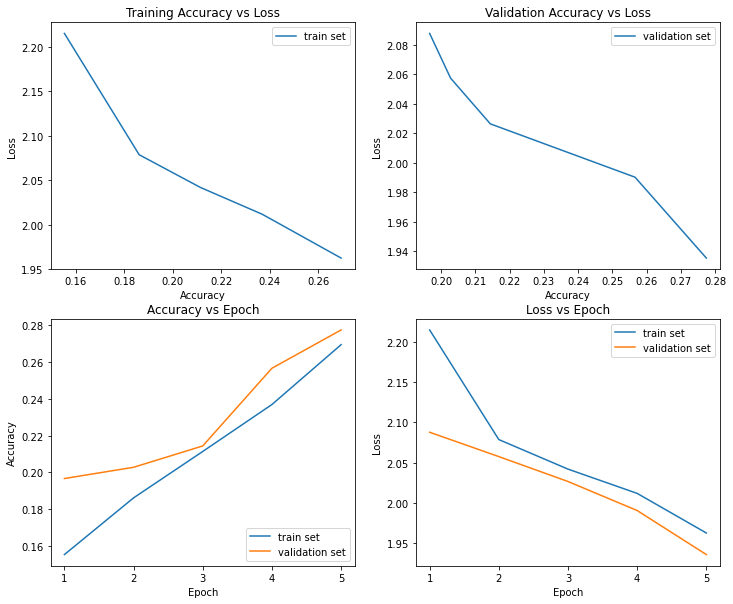

In [54]:
accuracy_loss_plot(train_MLP4)

# Comparison of MLP models - 

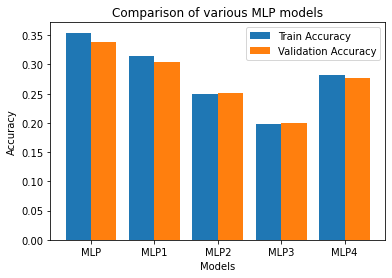

In [55]:
train_accuracies = [score_train_MLP[1], score_train_MLP1[1], score_train_MLP2[1], score_train_MLP3[1], score_train_MLP4[1]]
val_accuracies = [score_val_MLP[1], score_val_MLP1[1], score_val_MLP2[1], score_val_MLP3[1], score_val_MLP4[1]]

models = ['MLP','MLP1','MLP2','MLP3','MLP4']
X_axis = np.arange(len(models))
  
plt.bar(X_axis - 0.2, train_accuracies, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, val_accuracies, 0.4, label = 'Validation Accuracy')
  
plt.xticks(X_axis, models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of various MLP models")
plt.legend()
plt.show()


From the above bar graph, it can be observed that highest training and validation accuracy is for the original MLP model followed by model MLP1. MLP3 performs the worst among the 5 models. MLP3 has 5 hidden layers with 512 units each and by adding more layers, more trainable parameters (2,891,786) are added to the model which increases the model complexity. Increasing the number of hidden layers much more than the sufficient number of layers causes accuracy to decrease. MLP2 has 986,634 trainable parameter and hence the complexity is comparatively low. MLP2 and MLP4 give almost the same accuracy. The lower accuracy < 40 percent for each of these models could be attributed to the fact that MLPs do not do very well on image datasets due to loss of spatial information and not being translation invariant. Also, we are only training the dataset on the 20 percent of the total training set. Using the entire set could improve the accuracy (reaches upto 50 percent) for MLP.


,Train Accuracy,Train Loss,Val Accuracy,Val Loss
MLP,35.79,1.7621,33.88,1.8008
MLP1,30.89,1.8825,30.36,1.8720
MLP2,24.64,1.9622,25.08,1.9492
MLP3,19.60,2.0629,20.03,2.0517
MLP4,26.94,1.9623,27.74,1.9355


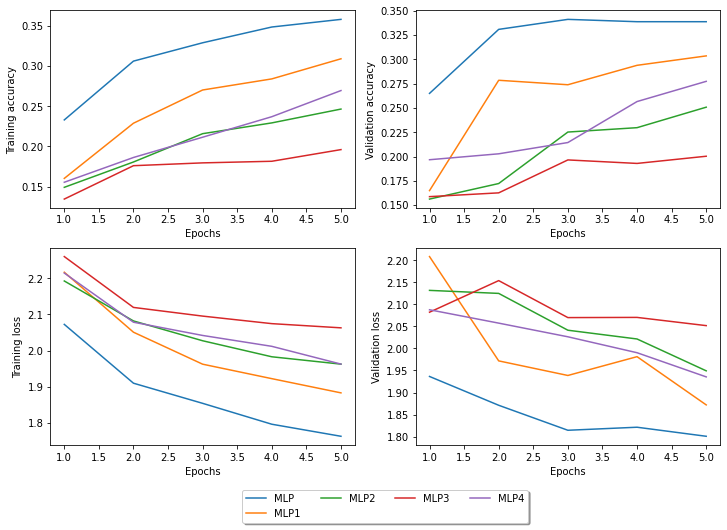

In [56]:
history_list1 = [train_MLP, train_MLP1, train_MLP2, train_MLP3, train_MLP4]
labels1 = ['MLP','MLP1','MLP2','MLP3','MLP4']
compare_models(history_list1, labels1)

From the above figure, we can observe MLP performs better as comapared to other MLP models. The training accuracy stops increasing after 4 epochs (horizontal line) but the validation accuracy keeps on increasing for original MLP. For MLP3, no or little learning happens after epoch 2 for the training set and after epoch 3 for validation set and performs the worst among these models. MLP2 and MLP4 perform similar on both the training and validation sets. MLP1 is the second best model after original MLP.

# 4. PERFORMANCE MLP vs CNNs

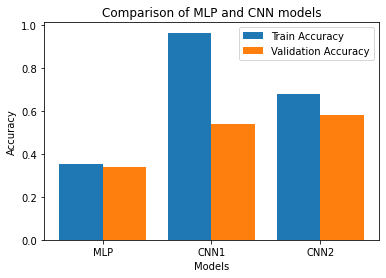

In [57]:
# plotting bar graph for comparison
train_accuracies2 = [score_train_MLP[1], score_train_CNN1[1], score_train_CNN2[1]]
val_accuracies2 = [score_val_MLP[1], score_val_CNN1[1], score_val_CNN2[1]]

models = ['MLP','CNN1','CNN2']
X_axis = np.arange(len(models))
  
plt.bar(X_axis - 0.2, train_accuracies2, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, val_accuracies2, 0.4, label = 'Validation Accuracy')
  
plt.xticks(X_axis, models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of MLP and CNN models")
plt.legend()
plt.show()

From the bar graph above, it can be observed that MLP gives around 34 percent accuracy on the training set and 34 percent on validation set. MLPs do not perform very well on the image datasets as the spatial information is lost when the image is flattened (matrix to vector) before feeding to the MLP. MLPs react differently to an input (images) and its shifted version — they are not translation invariant. For example, if a picture of a cat appears in the top left of the image in one picture and the bottom right of another picture, the MLP will try to correct itself and assume that a cat will always appear in this section of the image. MLPs use one perceptron for each input and the amount number of weights rapidly becomes unmanageable for large images. It includes too many parameters because it is fully connected. Each node is connected to every other node in next and the previous layer, forming a very dense web — resulting in redundancy and inefficiency.

CNNs, on the other hand perform way better than MLP on Image datasets. The CNN architecture implicitly combines the benefits obtained by a standard neural network training with the convolution operation to efficiently classify images. By performing the convolution operations, the dimensionality of the data shrinks significantly. Hence, the number of parameters to be learned decreases. Hence, the network complexity decreases. CNNs work well with data that has a spatial relationship. The benefit of using CNNs is their ability to develop an internal representation of a two-dimensional image. This allows the model to learn position and scale in variant structures in the data, which is important when working with images. CNN allows parameter sharing, weight sharing so that the filter looks for a specific pattern and is location invariant — can find the pattern anywhere in an image. CNN1 gives much higher training accuracy (> 90) but a moderate validation accuracy (54), the model is overfitting. The model complexity is too high for the given amount of training data and the model starts to memorize rather than approximating the relationship between input and output. CNN2 gives moderate accuracy on both training (65) and validation (55), which means it generalizes well. The performance of CNNs is better than MLP but they still suffer from problems, such as overfitting, among others.


,Train Accuracy,Train Loss,Val Accuracy,Val Loss
MLP,35.79,1.7621,33.88,1.8008
CNN1,91.15,0.2962,53.91,1.5696
CNN2,61.56,1.0903,58.15,1.1752


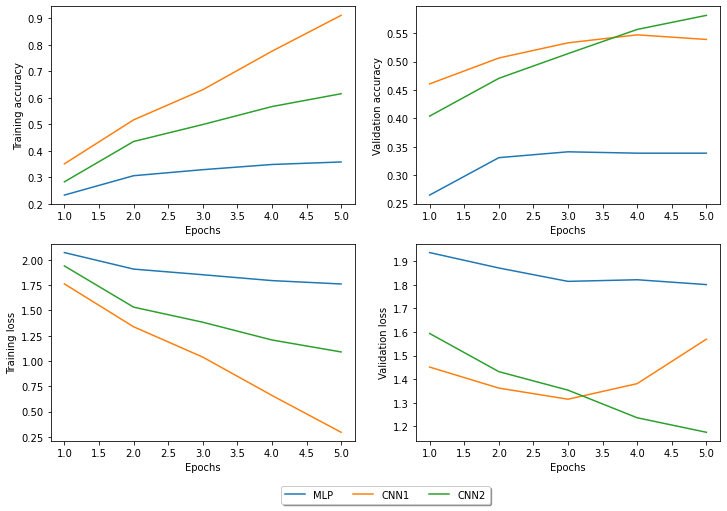

In [58]:
history_list2 = [train_MLP, train_CNN1, train_CNN2]
labels2 = ['MLP', 'CNN1', 'CNN2']
compare_models(history_list2, labels2)

The figure above clearly shows that CNN1 is overfitting. The slope for CNN1 is very steep for training accuracy whereas it is flat for validation data after epoch 3. Validation loss starts to increase after epoch 3 for CNN1. CNN2 gives moderate accuracy on both training (65) and validation (55), which means it generalizes well. If trained for more epochs, CNN2 could higher accuracy for both training and validation sets. MLP performs the worst among the three model. There is no learning happening after epoch 2 for both the sets.

# 5. COMPARISON OF CNN1 AND CNN2

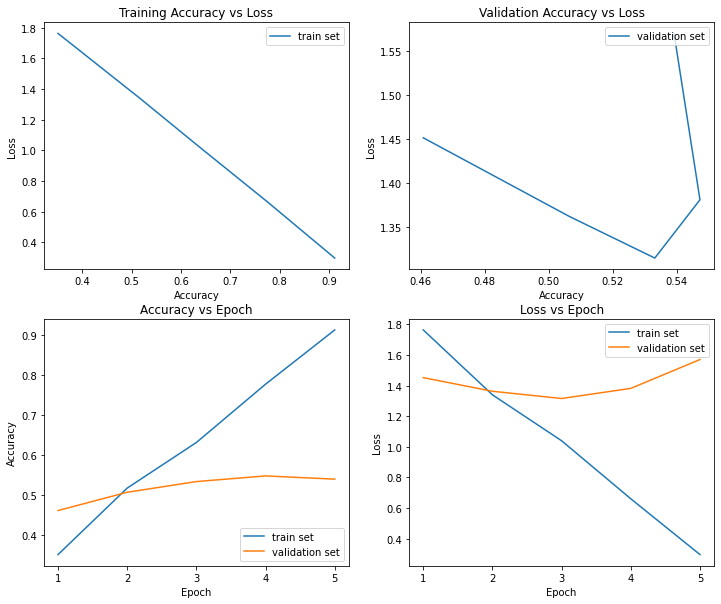

In [60]:
# training and validation curves for CNN1
accuracy_loss_plot(train_CNN1)

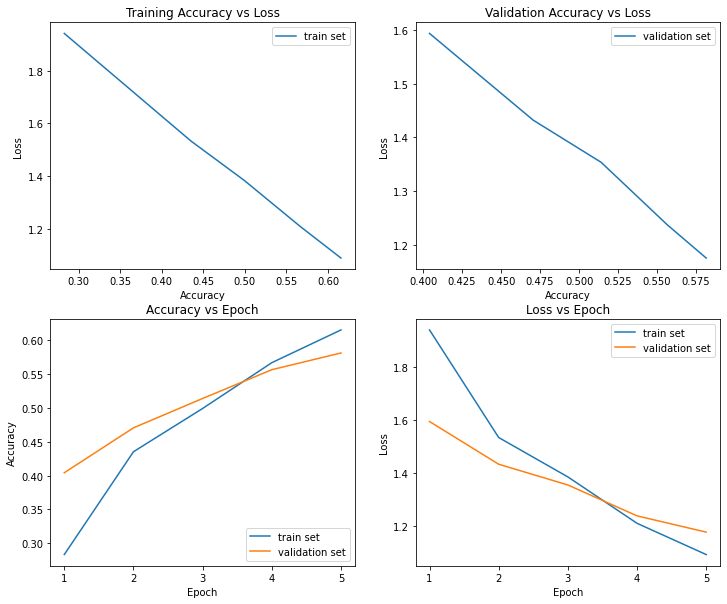

In [61]:
# training and validation curves for CNN2
accuracy_loss_plot(train_CNN2)

CNN1 gives 92 percent for the training set but 53 percent for the validation set. This means that CNN1 is overfitting and cannot generalize beyond the training set. Overfitting can be simply thought of as fitting patterns that do not exist due to the high number of features or the low number of training examples. CNN1 is memorizing the relationship between input and output for training data rather than approximating and hence does not generalize well. This could be due to the fact that we have 2 fully connected layers after 2 Convolutional layers, hence the model is too powerful for the given amount of training data. The model complexity is too high, as we 25,997,130 trainable parameters. Also, as we are using a subset of whole training set, the model is too complex for the selected training set. Overfitting happens when the dataset is not large enough to accommodate the number of features. CNN2 which is a less complex model as compared to CNN1, with only 1,486,666 trainable parameters, gives 65 percent on the training set and 57 percent on the validation set. This model is able to generalize well as compared to CNN1. We added regularization in the form of dropout (randomly deactivate neurons), hence reducing the overfitting. We also added max pooling in CNN2. Pooling in some sense tries to do feature selection by reducing the dimension of the input.  So, by selecting a subset of features, we are less likely to find false patterns.

From the training and validation curves, we observe that CNN1 starts overfitting after the validation accuracy reaches 55 percent as the loss starts increasing very steeply. The loss keeps on decreasing for the training set. The epoch vs accuracy curve shows that for training set, the accuracy rises steeply from epoch 1 to epoch 2, steadies a bit from epoch 2 to epoch 3 and then continues to rise till epoch 5. However, the slope is not so steep for validation set as the validation accuracy stops increasing after epoch 3. 
On the other hand, for CNN2 both the training and validation accuracy increase from epoch 1 to epoch 5. The epoch vs accuracy curve shows that for training set, the accuracy rises steeply from epoch 1 to epoch 2, steadies a bit from epoch 2 to epoch 3 and then continues to rise till epoch 5. For the validation set, rises from epoch 1 to epoch 2, does not change much from epoch 2 to epoch 3 and then continues to rise form epoch 3 till epoch 5. The rate of increase of accuracy is almost same for both training and validation from epoch 3 to epoch 5. The loss decreases in a similar fashion as the accuracy increases.

Training Time -  

CNN1 – 0.45 minute

CNN2 – 0.30 minute 

CNN1 takes approximately 1.5 times the time required to train CNN2. As explained above, CNN2 model has regularization in the form of dropout (randomly deactivate neurons) and pooling layer (a subset of features) which significantly reduces the complexity and reduces the number of trainable parameters from 25,997,130 to 1,486,666. Hence, CNN2 takes significantly less time to train as compared to CNN1.

If the networks were trained for more epochs, CNN2 is still expected to perform as compared to CNN1. CNN1 seems to be too powerful for this amount of training data and has very high complexity. From the epoch vs accuracy graph for CNN1, we can expect the training accuracy to further increase to 98-99 percent, but the validation accuracy would remain almost the same (the slope of curve 0 - horizontal). The model would still overfit. However, looking at the slope of CNN2, the model is expected give higher accuracy for both training and validation sets as the number of epochs are increased. Training the model for 30-40 could give 85-90 percent on the training set and 75- 80 on the validation. Further increasing the number of epochs for CNN2, the model start to overfit. Once important factor contributing to overfitting of CNN1 is small amount of training data as compared to size of validation data. The training data is expected to around 7-8 times the validation data. Hence, more data needs to be used prevent overfitting in CNN1 and CNN2 as well after some point.


# 6. RECOMMENDATIONS TO IMPROVE THE NETWORK

•	**More Training data** - The model can only store so much information. This means that the more training data we feed it, the less likely it is to overfit. The reason is that, as we add more data, the model becomes unable to overfit all the samples, and is forced to generalize to make progress. Training the model on the whole training set instead of 20% randomly sampled data would reduce the chance of overfitting and give better accuracy on both the MLP and CNN models.

•	**Reduce architecture complexity** - Another way to reduce overfitting is to lower the capacity of the model to memorize the training data. As such, the model will need to focus on the relevant patterns in the training data, which results in better generalization. This could be done by reducing the number of trainable parameters such that the model simple enough that it does not overfit, but complex enough to learn from the data. This also has the advantage of making the model lighter, train faster and run faster.

•	**Adding regularization (mostly dropout or  L1/L2)**  - One of the most powerful and well-known technique of regularization is to add a penalty to the loss function. The most common are called L1 and L2. With the penalty, the model is forced to make compromises on its weights, as it can no longer make them arbitrarily large. This makes the model more general, which helps combat overfitting. 
**Dropout** - The idea is to randomly deactivate either neurons (dropout) during the training. This forces the network to become redundant, as it can no longer rely on specific neurons or connections to extract specific features. Once the training is done, all neurons are restored.
As observed in CNN2, adding dropout layers after fully connected layers causes 20 percent of the neurons to randomly deactivate reduces the overfitting on the training set and the model is able to generalize well. Adding max pooling layers after convolutional layers reduces the dimension of the input by feature selection and the output has smaller dimension.

•	**Early Termination** - The model starts by learning a correct distribution of the data, and, at some point, starts to overfit the data. By identifying the moment where this shift occurs, we can stop the learning process before the overfitting happens. As before, this is done by looking at the training loss and validation loss over time. In CNN1, this shift occurs when the validation accuracy reaches 53 percent, as the validation loss starts increasing after that.

• **Considering alternate activation functions** (ReLU for fully connected layers) - ReLU is more computationally efficient to compute than Sigmoid like functions since ReLU just needs to pick max(0,x) and not perform expensive exponential operations as in Sigmoid. ReLU does not have the vanishing gradient problem. Vanishing gradients lead to very small changes in the weights proportional to the partial derivative of the error function. Although ReLU does have the disadvantage of dying cells (if too many activations get below zero then most of the units(neurons) in network with Relu will simply output zero, in other words, die) which limits the capacity of the network. To overcome this, we can use a variant of ReLU such as leaky ReLU, ELU. We could consider using ReLU in the network for full connected layers as well instead of sigmoid.

• **Batch Normalization and using larger batch size** - Batch normalization makes the input to each layer have zero mean and unit variance. Batch normalization yields faster training, higher accuracy and enable higher learning rates. This suggests that it is the higher learning rate that BN enables, which mediates the majority of its benefits; it improves regularization, accuracy and gives faster convergence. It has a regularizing effect which means you can often remove dropout.

•	**Data augmentation & Noise** – We can try to make our data appear as if it was more diverse. To do that, we can use data augmentation techniques so that each time a sample is processed by the model, it is slightly different from the previous time. This will make it harder for the model to memorize parameters for each sample. We can also add noise to the input and output making the model robust to natural perturbations and this will make the training more diversified. However, the magnitude of the noise should not too be great. 
